# 2. Linear Regression and Logistic Regression
After you have set up the git repository and the Python environment, you can start implementing the linear regression and logistic regression algorithms.
In this lab, we will try to solve two types of problems: regression and classification. We will use the linear regression algorithm to solve the regression problem and the logistic regression algorithm to solve the classification problem.


## 2.1 Linear Regression
In the first part of the lab, you will implement the linear regression algorithm. The linear regression algorithm is used to predict the value of a continuous variable. The algorithm finds the best-fitting straight line through the points. The best-fitting line is the one that minimizes the sum of the squared differences between the observed values and the values predicted by the line.

1. Use the jupyter notebook `lec2.ipynb` and try to import the California housing dataset.
```python
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
```

In [1]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [5]:
print(type(california))

<class 'sklearn.utils._bunch.Bunch'>


In [7]:
import pandas as pd

In [8]:
# Convert the data to a Pandas DataFrame
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)

# Add the target variable (median house value)
california_df['target'] = california.target

# Display the first few rows of the DataFrame
print(california_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [9]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


2. Split the dataset into training and testing sets.
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=42)
```

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=42)

3. Train the linear regression model using the training set.
```python
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
```

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

4. Evaluate the model using the testing set.
```python
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)
```

In [12]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.5558915986952425


5. Plot the learning curves.
```python
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(lin_reg, california.data, california.target, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curves')
plt.legend(loc="best")
plt.show()
```

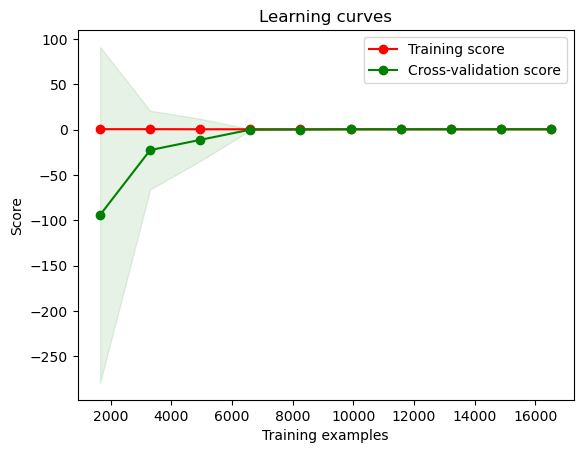

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(lin_reg, california.data, california.target, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curves')
plt.legend(loc="best")
plt.show()

In [22]:
train_scores

array([[0.67378263, 0.70930607, 0.70930607, 0.70930607, 0.70930607],
       [0.64396688, 0.71586072, 0.71586072, 0.71586072, 0.71586072],
       [0.62674476, 0.66153976, 0.59653187, 0.59653187, 0.59653187],
       [0.56797268, 0.65174599, 0.60695491, 0.60695491, 0.60695491],
       [0.56287472, 0.63470934, 0.58658663, 0.58658663, 0.58658663],
       [0.58320638, 0.64415206, 0.59736275, 0.59932125, 0.59932125],
       [0.57048588, 0.61602966, 0.57420647, 0.59423356, 0.59423356],
       [0.5838947 , 0.62212033, 0.59369738, 0.59445155, 0.59763037],
       [0.58687219, 0.6281347 , 0.60462705, 0.60063268, 0.59550871],
       [0.59610368, 0.63332765, 0.61097988, 0.61062026, 0.58443293]])

In [23]:
test_scores

array([[-4.64804132e+02, -2.42713968e-02,  2.30368990e-01,
         1.54502233e-01, -5.40185416e+00],
       [-1.09361704e+02, -1.88674785e-02,  2.30953815e-01,
         2.28619429e-01, -3.16546310e+00],
       [-5.76950998e+01,  4.73720117e-01,  5.37768103e-01,
         4.87598866e-01,  6.29272044e-01],
       [-1.37596745e+00,  4.73239568e-01,  5.49659517e-01,
         4.67600868e-01,  6.36439879e-01],
       [-6.39719382e-01,  4.68030381e-01,  5.47789562e-01,
         4.87918186e-01,  6.34559273e-01],
       [ 4.78757057e-01,  4.63209735e-01,  5.48749182e-01,
         4.97971500e-01,  6.40564423e-01],
       [ 4.02136815e-01,  4.64289052e-01,  5.46853093e-01,
         5.05033664e-01,  6.43680912e-01],
       [ 4.70561907e-01,  4.73065796e-01,  5.49847100e-01,
         5.30493742e-01,  6.50702399e-01],
       [ 5.15994272e-01,  4.70701325e-01,  5.52458837e-01,
         5.37186286e-01,  6.54217147e-01],
       [ 5.48663233e-01,  4.68206909e-01,  5.50784342e-01,
         5.36987027e-01

In [20]:
import numpy as np
np.linspace(0.1, 1.0,15)

array([0.1       , 0.16428571, 0.22857143, 0.29285714, 0.35714286,
       0.42142857, 0.48571429, 0.55      , 0.61428571, 0.67857143,
       0.74285714, 0.80714286, 0.87142857, 0.93571429, 1.        ])

6. In the repository, create a new file called `lab2.md` at `labs/lab2/` and write what you can conclude from the plot of Step 5 and what does the function `learning_curve` do.

## 2.2 Logistic Regression
In the second part of the lab, you will implement the logistic regression algorithm. The logistic regression algorithm is used to predict the probability of a binary outcome. The algorithm finds the best-fitting line through the points. The best-fitting line is the one that minimizes the sum of the squared differences between the observed values and the values predicted by the line.

1. Load the iris dataset and select only the first two features.
```python
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target == 0).astype(np.int)
```

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target == 0).astype(int)

### in below cell i  will just try and look at my data set thruough pandas 

In [30]:
# Convert the data to a Pandas DataFrame
iris_df = pd.DataFrame(data=X)#, columns=iris.feature_names)

# Add the target variable 
iris_df['target'] = y

# Display the first few rows of the DataFrame
iris_df.sample(10)

,0,1,target
16,5.4,3.9,1
6,4.6,3.4,1
135,7.7,3.0,0
132,6.4,2.8,0
82,5.8,2.7,0
145,6.7,3.0,0
11,4.8,3.4,1
43,5.0,3.5,1
39,5.1,3.4,1
26,5.0,3.4,1


2. Split the dataset into training and testing sets.
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Train the logistic regression model using the training set.
```python
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
```

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

4. Evaluate the model using the testing set.
```python
y_pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
```

In [33]:
y_pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


5. Plot the decision boundary.
```python
x0, x1 = np.meshgrid(
        np.linspace(4, 8, 500).reshape(-1, 1),
        np.linspace(1.5, 4.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Setosa", fontsize=14, color="b", ha="center")
plt.text(6.5, 3.5, "Iris-Setosa", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([4, 8, 1.5, 4.5])
plt.show()
```

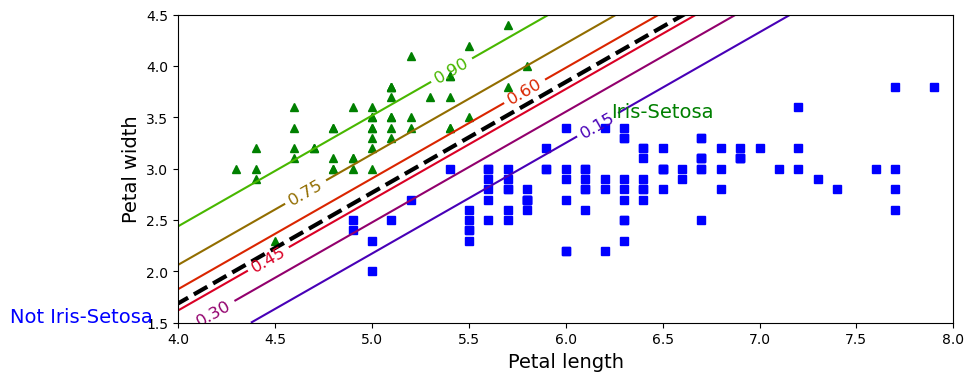

In [34]:
x0, x1 = np.meshgrid(
        np.linspace(4, 8, 500).reshape(-1, 1),
        np.linspace(1.5, 4.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Setosa", fontsize=14, color="b", ha="center")
plt.text(6.5, 3.5, "Iris-Setosa", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([4, 8, 1.5, 4.5])
plt.show()

In [37]:
y_proba_df=pd.DataFrame(y_proba)
y_proba_df.head()

,0,1
0,0.634799,0.365201
1,0.640638,0.359362
2,0.646436,0.353564
3,0.652191,0.347809
4,0.657902,0.342098


### 6. In the `lab2.md` at `labs/lab2/`, write what you can conclude from the plot of Step 5 and what does the function `predict_proba` do.

# my conclusion based on ploting in step 05
* The contour plot represents the decision boundary of the logistic regression model. This boundary separates the regions predicted as "Iris-Setosa" and "Not Iris-Setosa" based on the features 
* Blue squares ('bs') represent data points classified as "Not Iris-Setosa."
* Green triangles ('g^') represent data points classified as "Iris-Setosa."
* The shades on the contour plot indicate the predicted probabilities of being in the positive class (Iris-Setosa). Darker regions correspond to higher probabilities, while lighter regions correspond to lower probabilities.
* The black dashed line represents the decision boundary line, where the predicted probability is around 0.5, effectively separating the two classes.

# about predict_proba
* y_proba = log_reg.predict_proba(X_new) computes the predicted probabilities
* probabilities of the input samples belonging to each class in a classification problem
* I have called the result below for clarity 


In [38]:
y_proba_df=pd.DataFrame(y_proba)
y_proba_df.head()

,0,1
0,0.634799,0.365201
1,0.640638,0.359362
2,0.646436,0.353564
3,0.652191,0.347809
4,0.657902,0.342098
